In [9]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 1

In [11]:
inputdir_fractured = "C:/Code/training/BoneDataset/fracured"
inputdir_notfractured = "C:/Code/training/BoneDataset/not_fracured"
outputdir_fractured = "C:/Code/training/PreprocessedDataset/fracured"
outputdir_notfractured = "C:/Code/training/PreprocessedDataset/not_fracured"

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "BoneDataset",
    shuffle= True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    color_mode = "grayscale"
)

NotFoundError: Could not find directory BoneDataset

In [5]:
class_names = dataset.class_names
class_names

['fractured', 'not_fractured']

In [9]:
len(dataset) #batch size = 32 so 9463 / 32 

296

In [7]:
#data visualization

In [8]:
for image_batch,label_batch in dataset.take(1): #this gives a single batch of images i.e 32
    print(image_batch.shape)
    print(label_batch.numpy()) #while using tensorflow every element you get is a tensor so we need to convert that to numpy

(32, 224, 224, 1)
[1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0]


In [10]:
len(train_ds)

NameError: name 'train_ds' is not defined

In [11]:
#(32, 224, 224, 3) #here 32 represents the batch size and 224 ,224 is the size of the image and 3  is the rgb channels 
#[0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0]

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
(224, 224, 1)


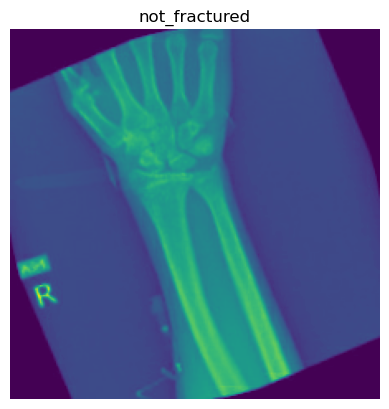

In [10]:
for image_batch,label_batch in dataset.take(1): #this gives a single batch of images i.e 32
    #print(image_batch[0]) # 1st image -> results tensor so for contverting the tensor to number array we use numpy()
    print(image_batch[0].numpy())
    print(image_batch[0].shape)
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off") #removes the axis
    plt.title(class_names[label_batch[0]]) #outputs the class label weather its a fractured or not

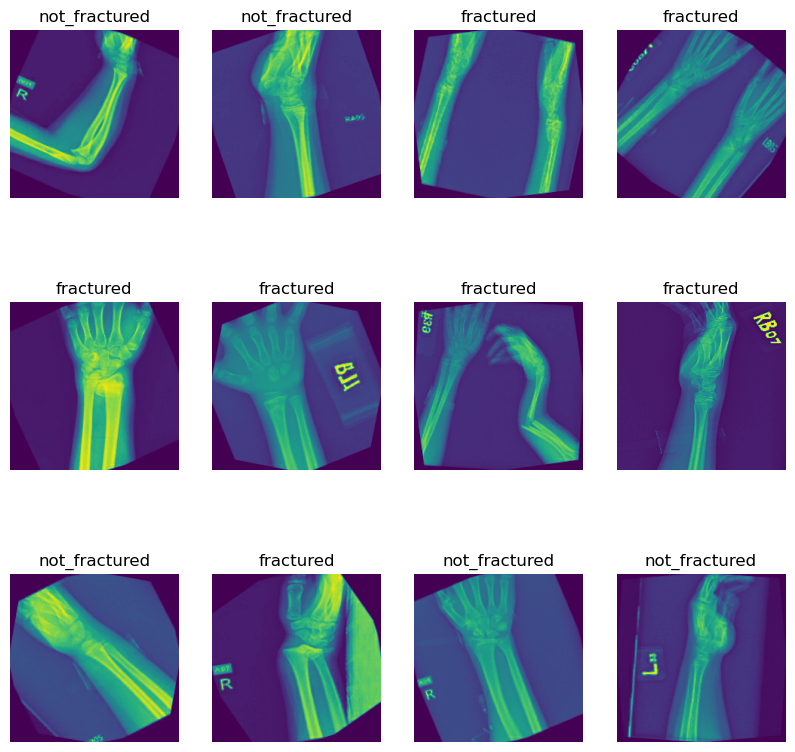

In [11]:
plt.figure(figsize=(10,10)) #increases the size of images
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1) #plot with in plot of 12 images with label
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off") #removes the axis
        plt.title(class_names[label_batch[i]])
        

In [14]:
80% ==> training
20% ==> 10% validation 10%test # 10% validation will do done during training process or when you run each epoch you do validation on that 10%.after we have final model then we use 10% dataset to measure the accuracy of our model.

SyntaxError: invalid syntax (1158802886.py, line 1)

In [15]:
train_size = 0.8 #80%
len(dataset) * train_size
# 236.8 //so we take 236.8 batches to train 

236.8

In [16]:
train_ds = dataset.take(237)

In [17]:
len(train_ds)

237

In [18]:
test_ds = dataset.skip(237)
len(test_ds)

59

In [19]:
val_size = 0.1 
len(dataset)* val_size

29.6

In [20]:
val_ds = test_ds.take(29)
len(val_ds)

29

In [21]:
test_ds = test_ds.skip(29)
len(test_ds)

30

In [16]:
def get_dataset_partations_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12) #before we spilt into train test split its better to shuffle for higher accuracy and seed is for predictibility it can be arbitary 
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, test_ds, val_ds

In [17]:
train_ds , test_ds ,val_ds = get_dataset_partations_tf(dataset)

In [18]:
len(train_ds)

236

In [19]:
len(test_ds)

31

In [20]:
len(val_ds)

29

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
#cache = read the image from the disk and then when you need same image in next iterarion it will keep that image in the memory so this improves the performance of pipleline 
# prefetch = when you are using gpu and cpu if gpu is busy trainning prefetch will load next set of batch from your disk that will improce the performance
# watch the video for more concept
# by doing this our ds is more optimized for training performance so the training is faster

In [22]:
#some preprocessing, in image processing first we do is scale 
# previoulsy we got the numbers between 0 and 255 so we divide it by 255 so that we get number between 0 and 1 
# pre processing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE), # this will resize any image that is not in the size 
    layers.experimental.preprocessing.Rescaling(1.0/255) # scale the image to 255 we will supply this layer when we actualy build our model
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1)
])

In [25]:
# model CNN ( watch Video of cnn)
#
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 2 
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3) ,activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3) ,activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax") #normalization
])

model.build(input_shape = input_shape)

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 1)         0         
                                                                 
 sequential_2 (Sequential)   (32, 224, 224, 1)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (32, 111, 111, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 54, 54, 64)          0         
 g2D)                                                 

In [27]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1 ,
    validation_data = val_ds 
)

Epoch 1/50


236/236 [==============================] - 160s 621ms/step - loss: 0.6853 - accuracy: 0.5329 - val_loss: 0.6542 - val_accuracy: 0.5894
Epoch 2/50
236/236 [==============================] - 138s 585ms/step - loss: 0.6541 - accuracy: 0.5624 - val_loss: 0.6209 - val_accuracy: 0.6067
Epoch 3/50
236/236 [==============================] - 143s 606ms/step - loss: 0.6423 - accuracy: 0.5782 - val_loss: 0.6333 - val_accuracy: 0.5625
Epoch 4/50
236/236 [==============================] - 142s 603ms/step - loss: 0.6312 - accuracy: 0.6048 - val_loss: 0.6095 - val_accuracy: 0.6121
Epoch 5/50
236/236 [==============================] - 152s 644ms/step - loss: 0.6163 - accuracy: 0.6247 - val_loss: 0.5896 - val_accuracy: 0.6444
Epoch 6/50
236/236 [==============================] - 138s 585ms/step - loss: 0.5994 - accuracy: 0.6451 - val_loss: 0.5414 - val_accuracy: 0.7026
Epoch 7/50
236/236 [==============================] - 182s 772ms/step - loss: 0.5873 - accuracy: 0.6545 - val_loss: 0.5385

In [29]:
score = model.evaluate(test_ds)

31/31 [==============================] - 7s 99ms/step - loss: 0.1680 - accuracy: 0.9345


In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

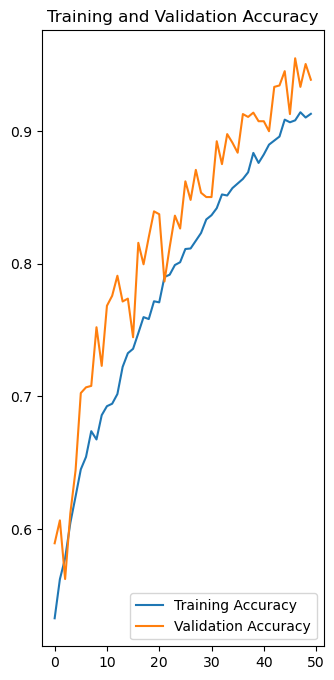

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation Accuracy')

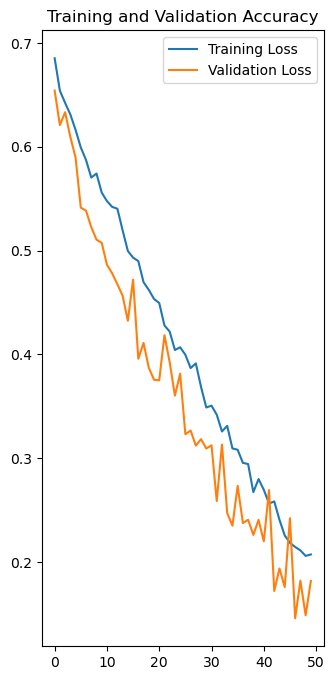

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Accuracy")

first image to predict
first image actual label: not_fractured
1/1 [==============================] - 1s 569ms/step
predicted label :fractured


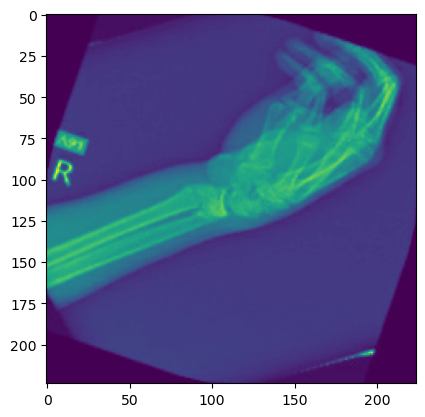

In [33]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  #  print(images_batch[0])
  #  print(image_batch[0].numpy().astype("uint8"))
   #  plt.imshow(images_batch[0].numpy().astype("uint8"))
    first_image = image_batch[20].numpy().astype("uint8")
    first_label = labels_batch[20].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label :" + class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


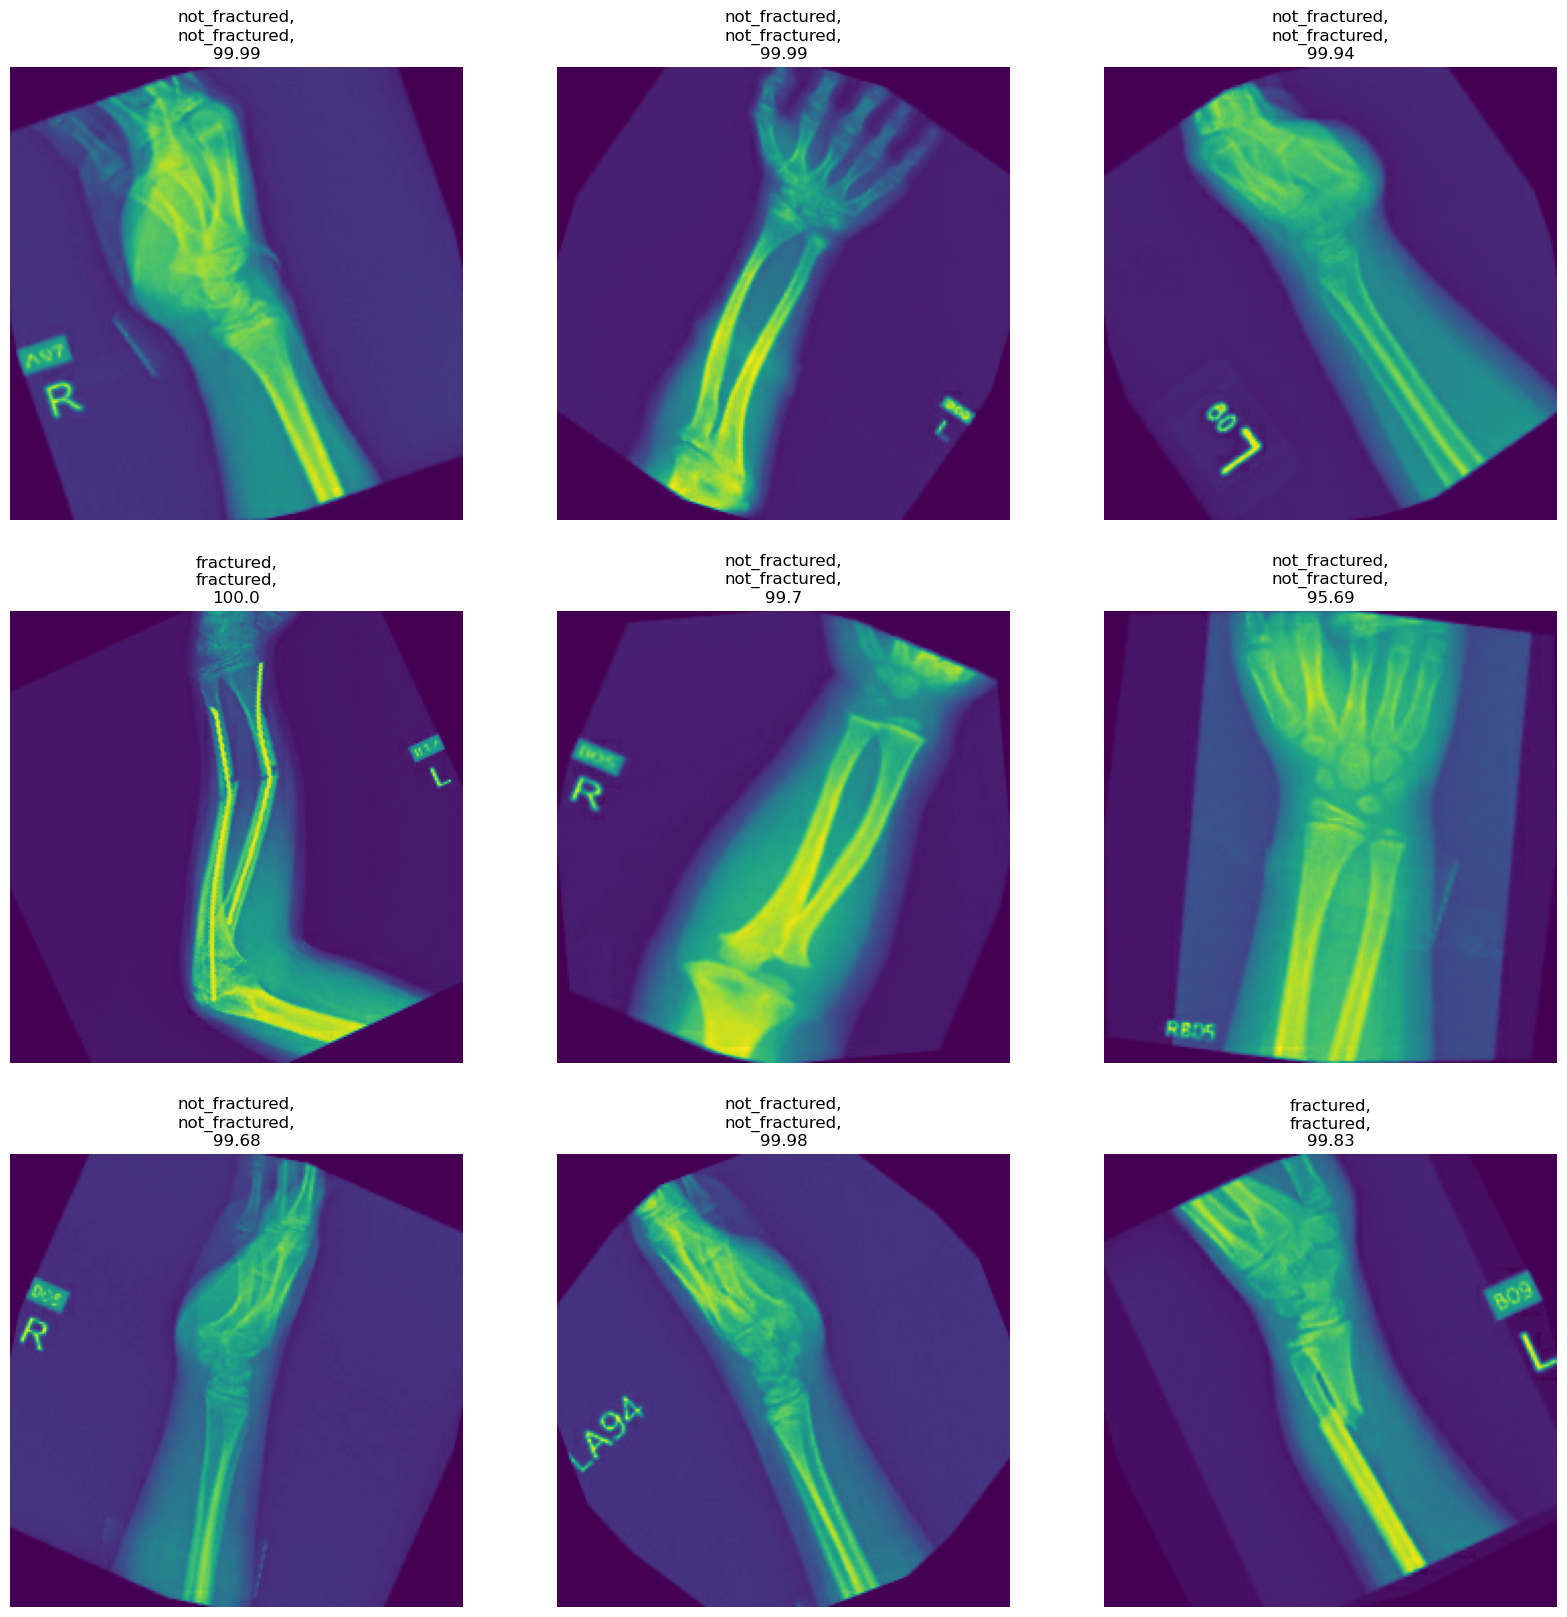

In [35]:
plt.figure(figsize=(20,20))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        #plt.title(f"Actual :{actual_class},\n Predicted: {predicted_class}.")
        plt.title(f"{actual_class},\n{predicted_class},\n{confidence}")
        plt.axis("off")

In [37]:
import os

In [38]:
model_version = max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


1/1 [==============================] - 0s 28ms/step
1.0 1.0 1.0


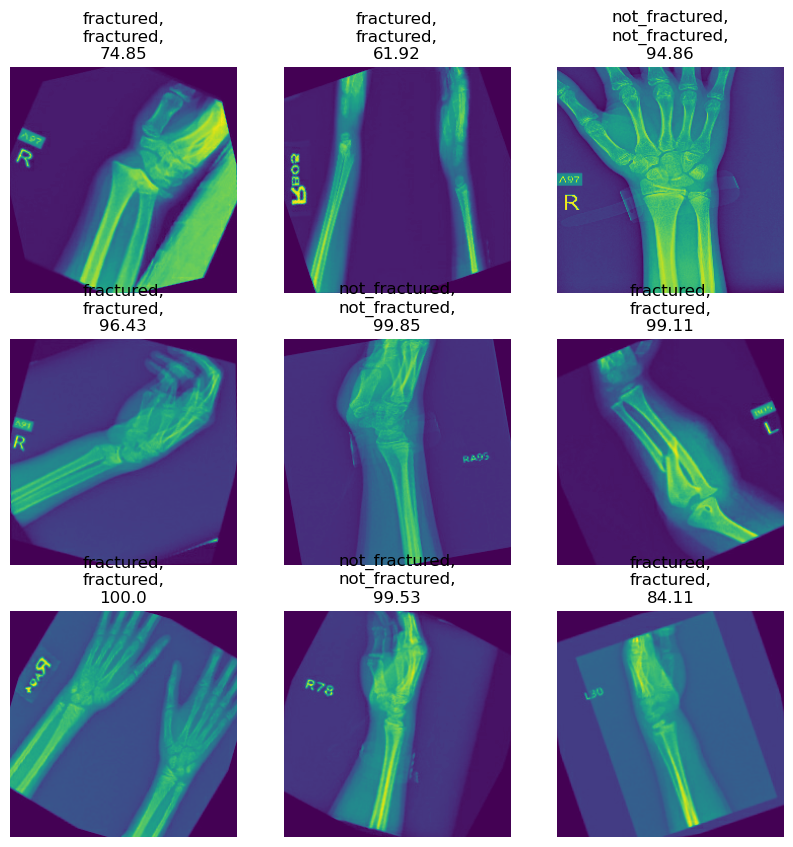

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10, 10))
true_labels = []
predicted_labels = []

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"{actual_class},\n{predicted_class},\n{confidence}")
        plt.axis("off")

        true_labels.append(actual_class)
        predicted_labels.append(predicted_class)

cm = confusion_matrix(true_labels, predicted_labels)
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / np.sum(cm)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(accuracy,precision,recall)

Text(0, 0.5, 'True Label')

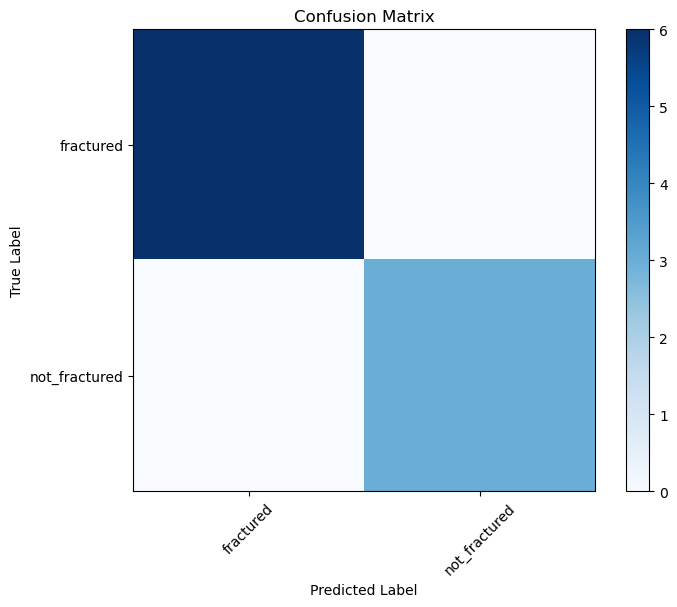

In [40]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
